## Import Necessary Libraries

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Define & Load Dataset

In [24]:
# Define the paths
train_path = r'C:\Users\PC\OneDrive\Documents\Internship\Housing Price Prediction (PI)\train.csv'
test_path = r'C:\Users\PC\OneDrive\Documents\Internship\Housing Price Prediction (PI)\test.csv'

# Load the datasets
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Verify the data has been loaded correctly
print(train_data.head())
print(test_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Prepare Data for Training

In [25]:
# Select features and target variable
X = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = train_data['SalePrice']

# Handle missing values in the test dataset
numeric_data = test_data.select_dtypes(include=np.number)
test_data.fillna(numeric_data.mean(), inplace=True)

## Split Data and Train the Model

In [26]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on validation data
y_pred = model.predict(X_val)

## Evaluate the Model

In [27]:
# Evaluate the model performance
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 35788.0612924363
Root Mean Squared Error (RMSE): 52975.71771338122
R-squared (R2): 0.6341189942328371


## Make Predictions on Test Data

In [28]:
# Prepare test data and make predictions
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']].copy()
X_test.fillna(X_test.mean(), inplace=True)

test_preds = model.predict(X_test)

# Save predictions to a CSV file
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_preds
})
submission.to_csv('submission.csv', index=False)

# Display the first few rows of the submission file
print("Submission File Preview:")
print(submission.head())

Submission File Preview:
     Id      SalePrice
0  1461  122173.313104
1  1462  140561.538683
2  1463  201783.754896
3  1464  199183.097221
4  1465  192133.739106


## Heatmap of Correlations

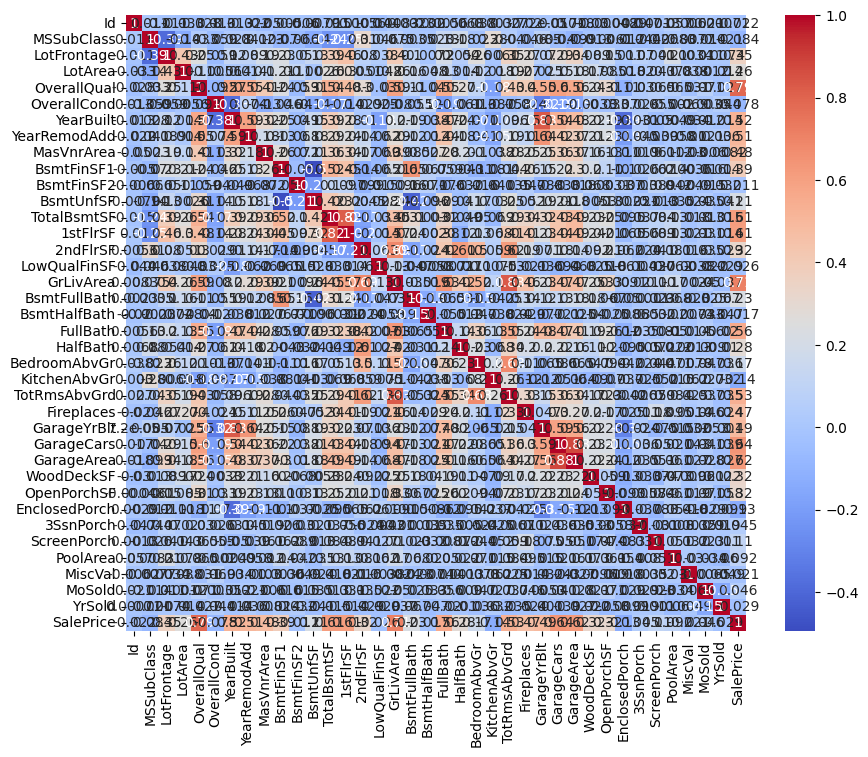

In [29]:
# Plot a heatmap of numerical feature correlations
plt.figure(figsize=(10, 8))

numeric_data = train_data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

plt.show()

## Addtional Visualisations

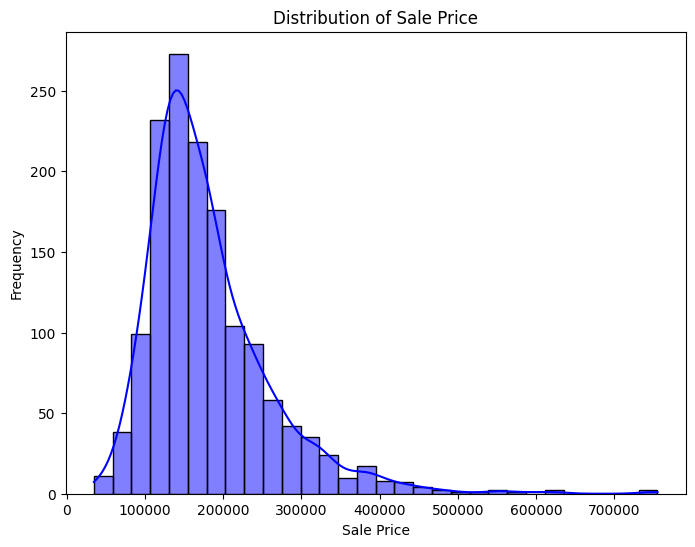

In [30]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30, color='blue')
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

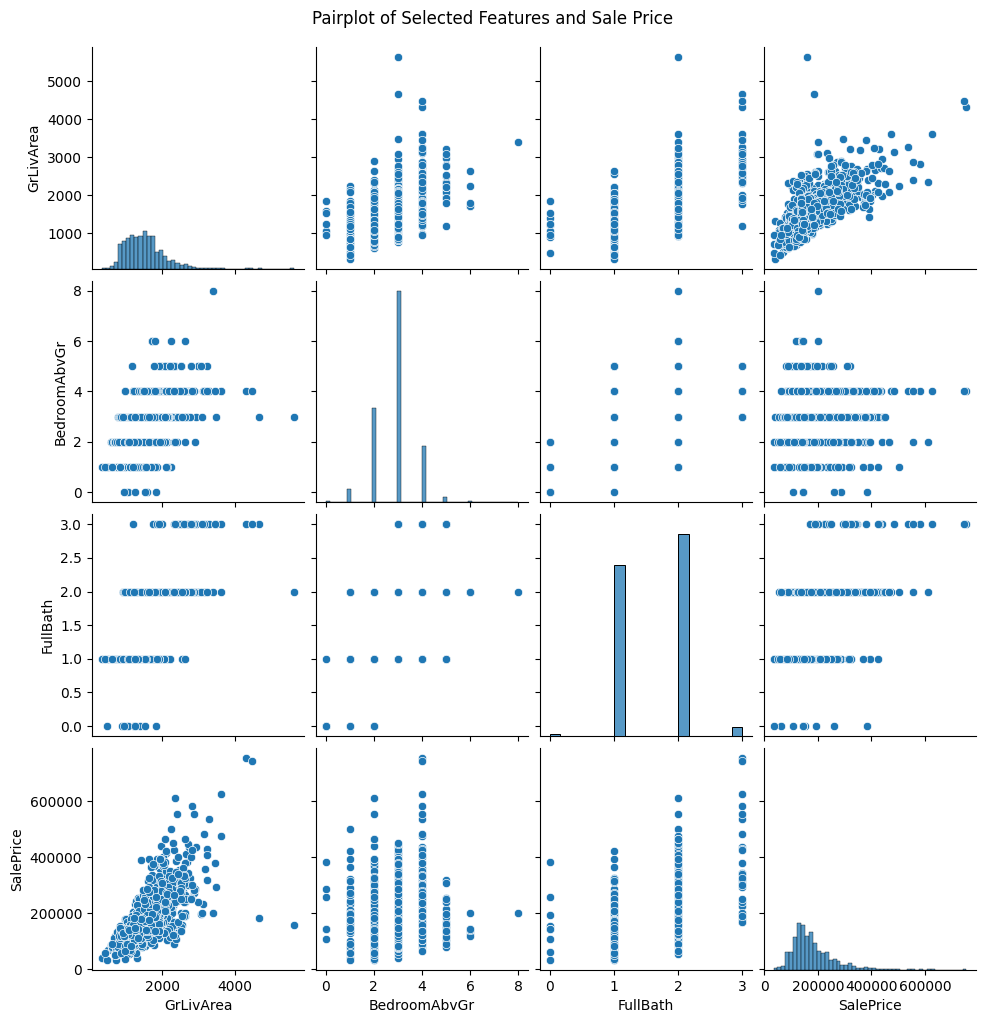

In [31]:
# Pairplot for key features and target variable
sns.pairplot(train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']])
plt.suptitle("Pairplot of Selected Features and Sale Price", y=1.02)
plt.show()

# Conclusion

The code implements a Linear Regression model to predict housing prices. While functional, its performance is moderate due to dataset limitations.

## Dataset Issues:
- Limited Features: Only GrLivArea, BedroomAbvGr, and FullBath were used, missing other key factors like location or year built.
- Missing Data: Imputation with mean values may have reduced prediction quality.
- Outliers and Noise: These can distort model accuracy, which Linear Regression cannot handle effectively.

## Model Performance:
The error metrics (MAE, RMSE) and R² indicate average accuracy, reflecting the dataset's lack of strong predictors.

## Recommendations:
- Add more relevant features (e.g., Neighborhood, YearBuilt).
- Handle outliers and use advanced imputation methods.
- Explore advanced models like Random Forest or XGBoost for better results.

With improvements, accuracy can significantly increase.